In [124]:
import math

scores = [*range(100, 190, 1)]
columns = math.ceil(len(scores)/23)

print(scores, columns)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189] 4


In [125]:
import os
import av
import math
import random
from torchvision.io import read_video
from torchvision.transforms.functional import to_pil_image

def load_video(video_path, rotate):
    video, audio, meta = read_video(video_path, pts_unit="sec", output_format="TCHW")
    frame_counts = len(video)
    fps = meta['video_fps']
    print(frame_counts, fps)
    sample_index = random.randrange(frame_counts)
    sample_frame = to_pil_image(video[sample_index])
    sample_frame = sample_frame.rotate(rotate, expand=True)
    return video, frame_counts, fps, sample_frame

In [126]:
cd samples

[Errno 2] No such file or directory: 'samples'
/Users/troydo42/Desktop/Body_Matrixes/samples


33 29.889322869663783


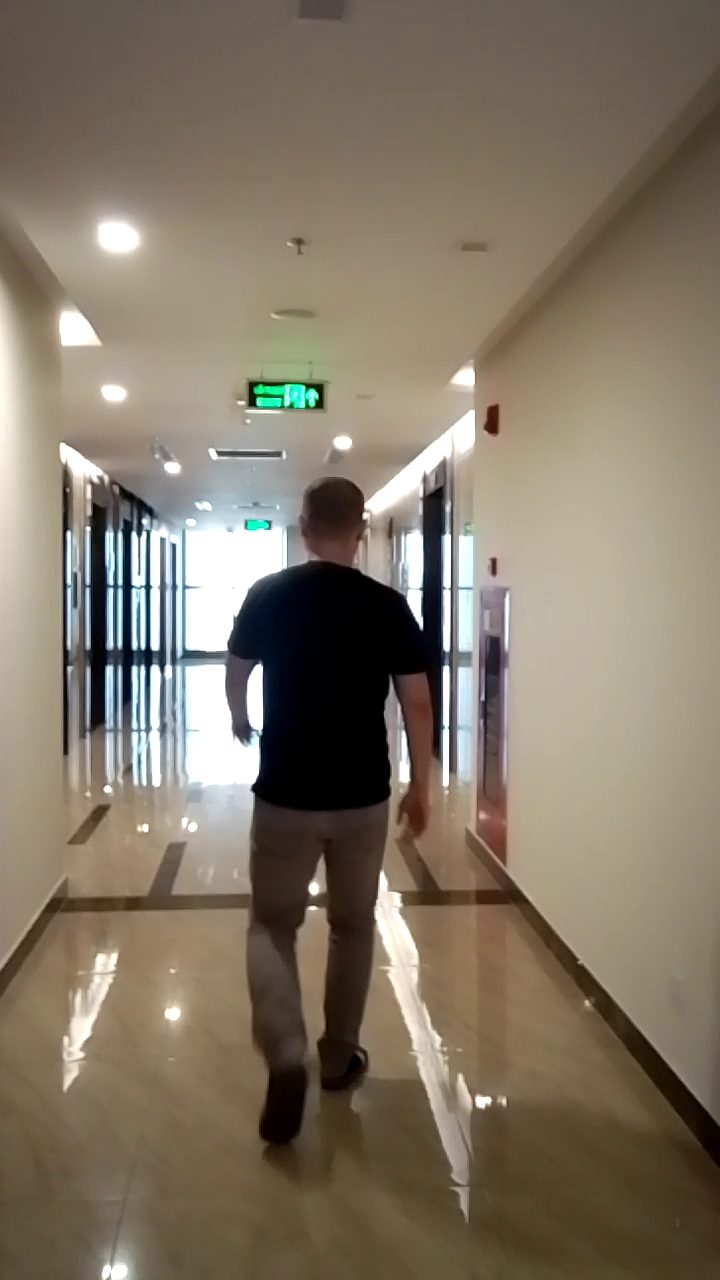

In [127]:
vid, frames, fps, sample = load_video("man.mp4", 90)
sample

In [128]:
from PIL import Image

height = sample.height
width = int(height/9*16)
margin = int((width - sample.width *2)/2)

print(height, width)

1280 2275


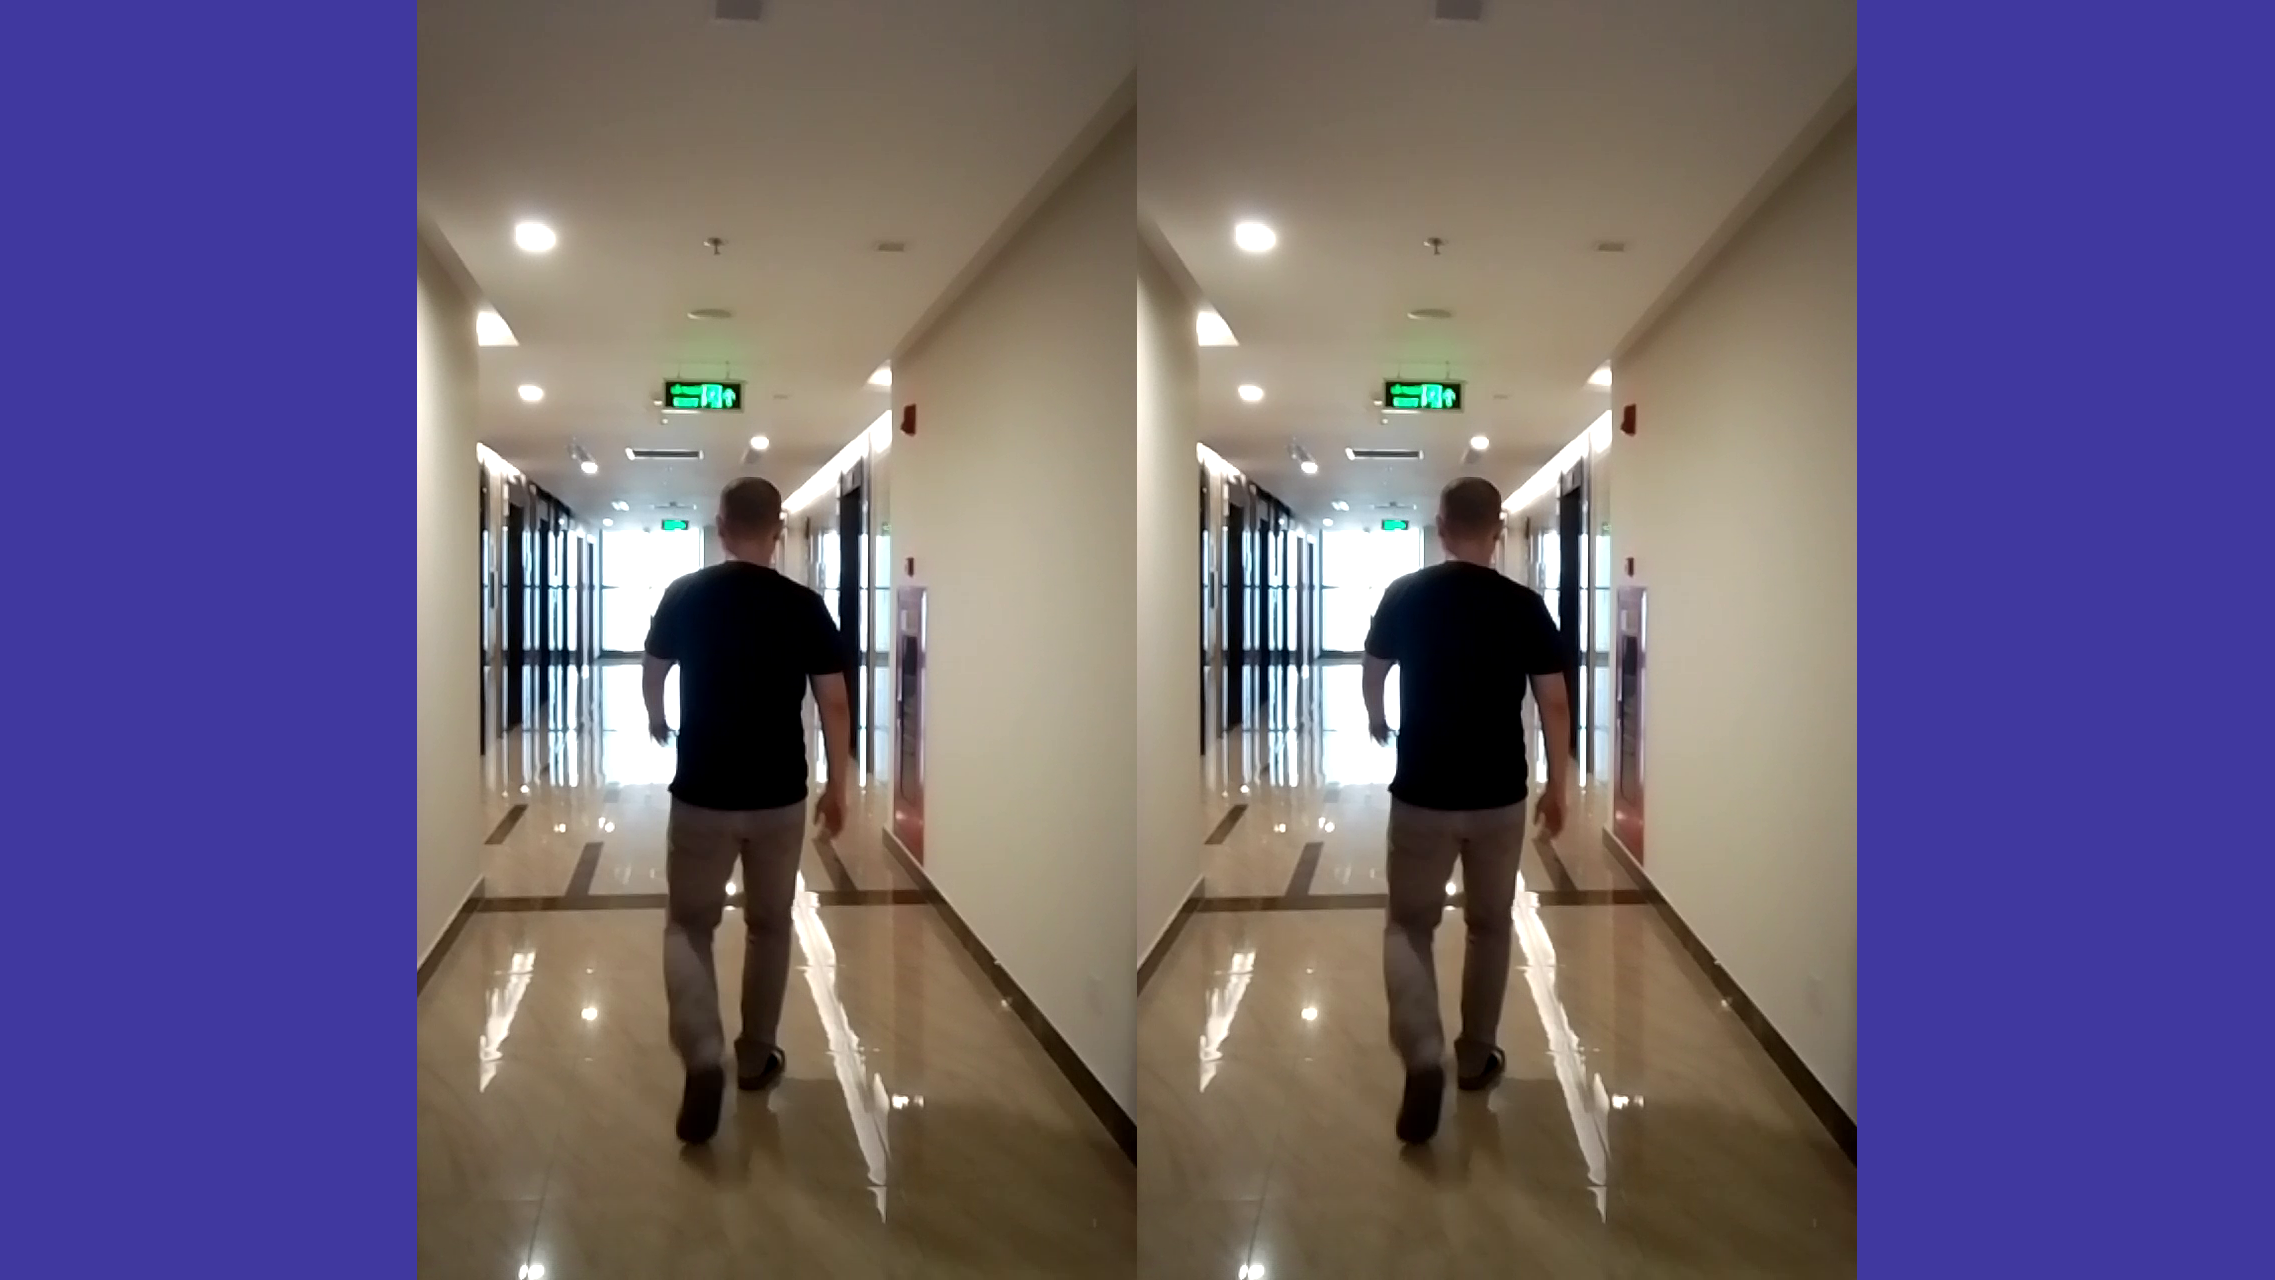

In [129]:
display = Image.new("RGB",(width, height), color="#40389F")
display.paste(im=sample, box=(margin, 0))
display.paste(im=sample, box=(margin+sample.width,0))

display

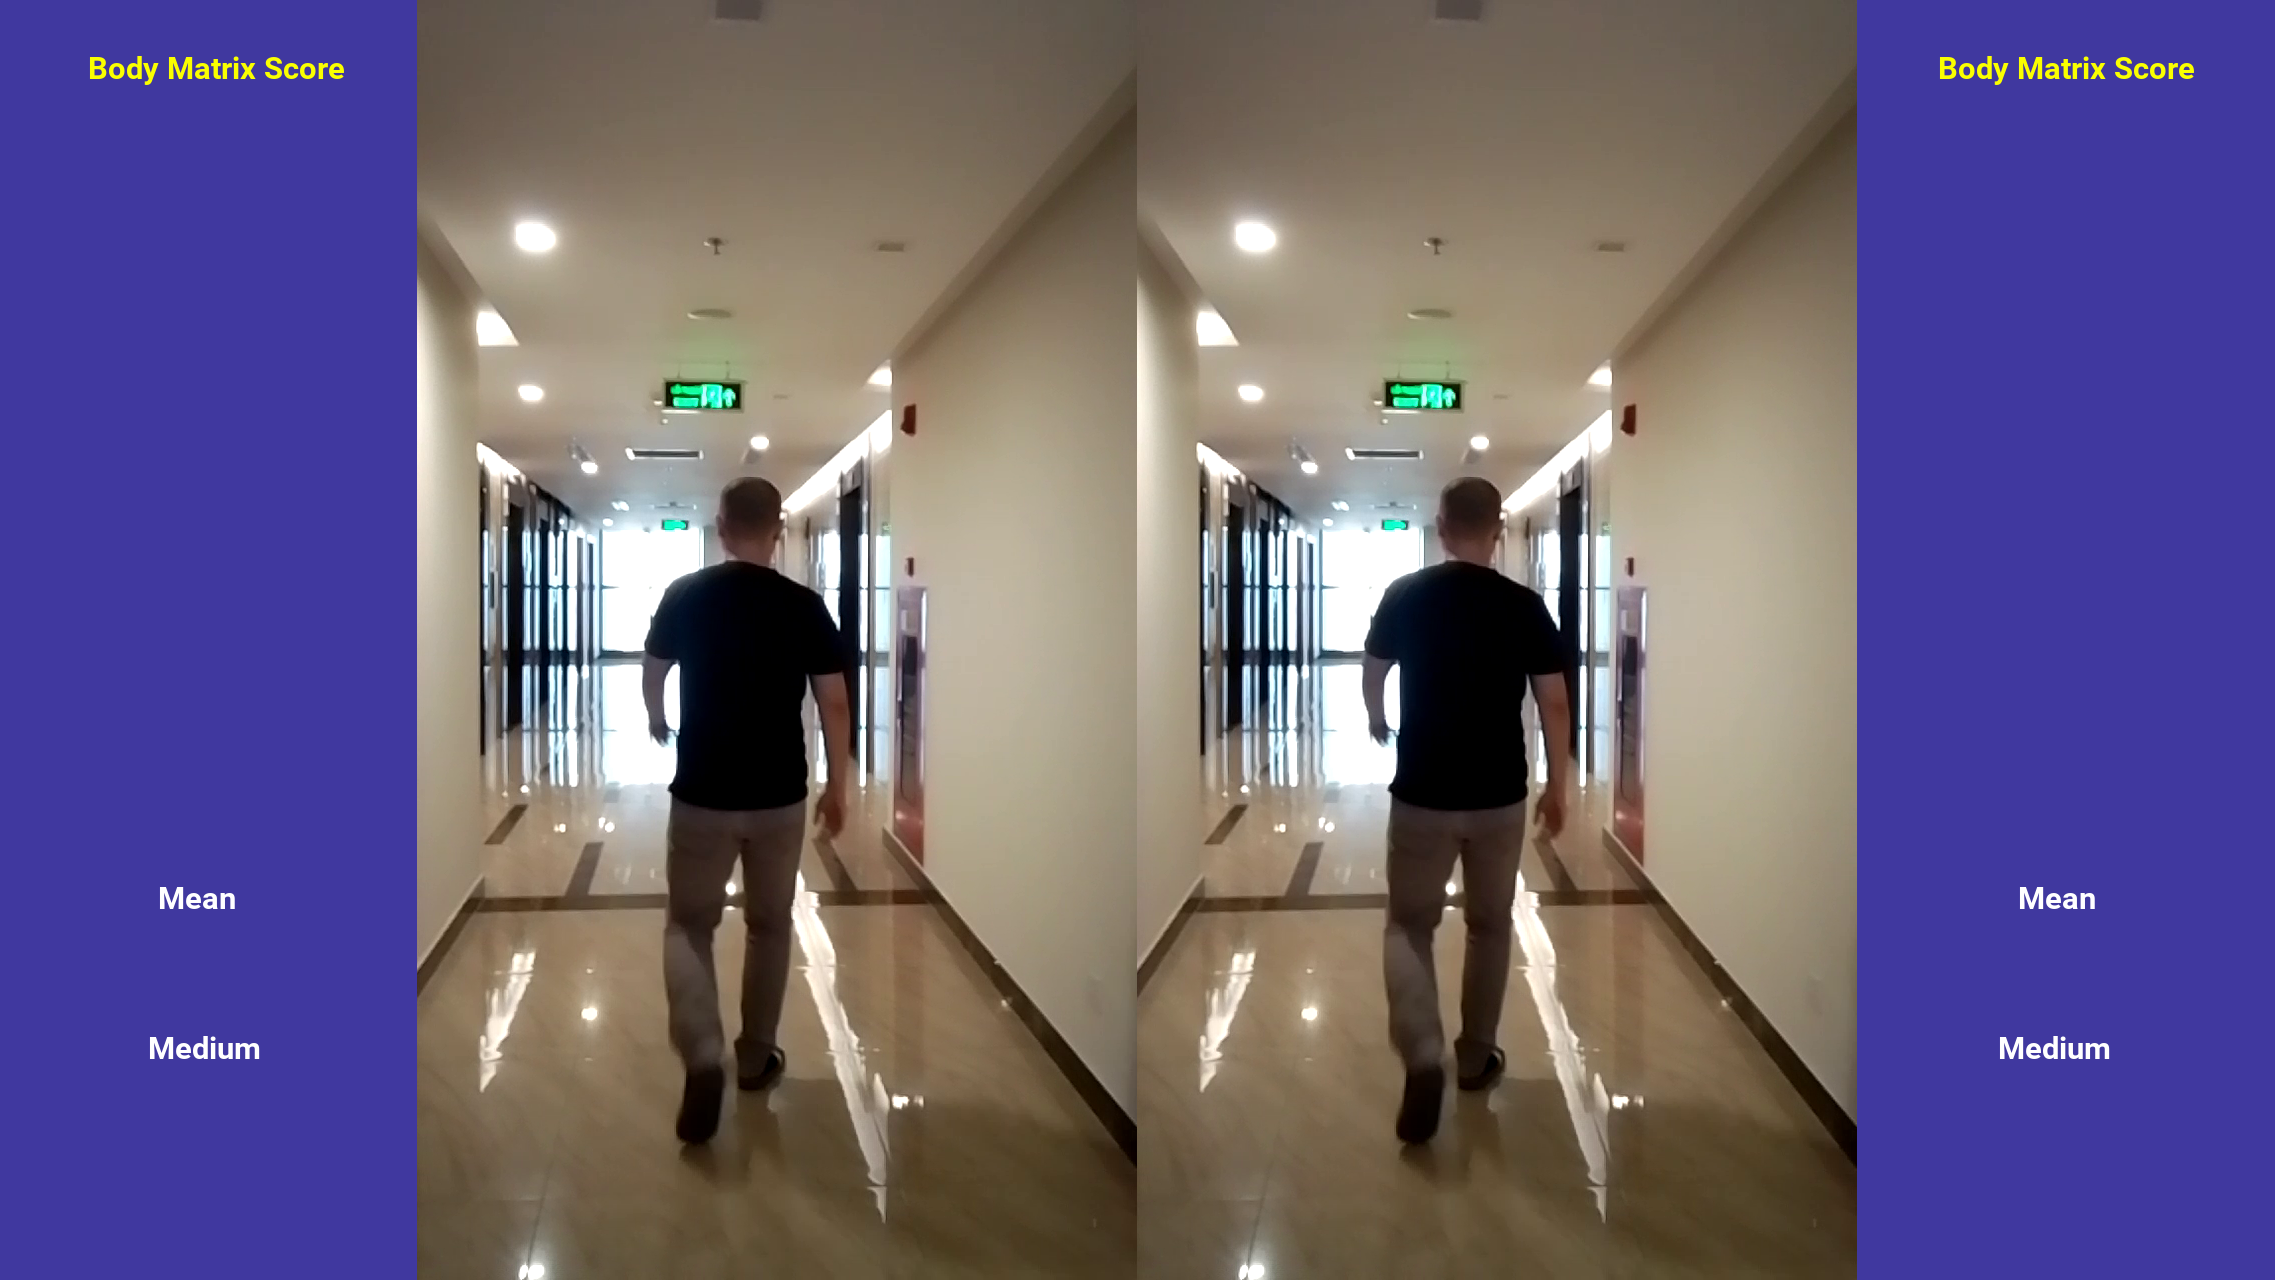

In [130]:
from PIL import ImageFont, ImageDraw
data_font = ImageFont.truetype("Roboto-Bold.ttf", 21)
title_font = ImageFont.truetype("Roboto-Bold.ttf", 31)

sample = display.copy()
draw = ImageDraw.Draw(sample)
draw.text(
    (margin/2-120, 50),
    "Body Matrix Score",
    fill="#FAFF00",
    font=title_font,
    align="center"
)

draw.text(
    (width-margin+80, 50),
    "Body Matrix Score",
    fill="#FAFF00",
    font=title_font,
    align="center"
)

### Drawing MEAN titles
draw.text(
    (margin/2-50, height-400),
    "Mean",
    fill="#FFFFFF",
    font=title_font,
    align="center"
)

draw.text(
    (width-margin+160, height-400),
    "Mean",
    fill="#FFFFFF",
    font=title_font,
    align="center"
)

### Drawing MEDIUM titles
draw.text(
    (margin/2-60, height-250),
    "Medium",
    fill="#FFFFFF",
    font=title_font,
    align="center"
)

draw.text(
    (width-margin+140, height-250),
    "Medium",
    fill="#FFFFFF",
    font=title_font,
    align="center"
)

sample


In [131]:
sample02 = sample.copy()
draw02 = ImageDraw.Draw(sample02)


# Left Columns
left_margin = 80
top_left_margin = 150

for index, score in enumerate(scores):
    col_pos = math.floor(index/22)
    row_pos = math.floor(index%22)
    x_pos = left_margin + col_pos * 60 
    y_pos = top_left_margin + row_pos * 31
    
    draw02.text(
        (x_pos, y_pos),
        str(score),
        fill="#FAFF00",
        font=data_font,
        align="center"
    )
    
# Right Columns

right_margin = width - margin + left_margin
top_right_margin = 150

for index, score in enumerate(scores):
    col_pos = math.floor(index/22)
    row_pos = math.floor(index%22)
    x_pos = right_margin + col_pos * 60 
    y_pos = top_right_margin + row_pos * 31
    
    draw02.text(
        (x_pos, y_pos),
        str(score),
        fill="#FAFF00",
        font=data_font,
        align="center"
    )
    

In [132]:
import numpy as np
mean = np.mean(scores)
medium = np.mean(scores)

print(mean, medium)

144.5 144.5


In [133]:
sample03 = sample02.copy()
draw03 = ImageDraw.Draw(sample03)

### Drawing MEAN Values
draw03.text(
    (margin/2-50, height-400+60),
    str(mean),
    fill="#FAFF00",
    font=title_font,
    align="center"
)

draw03.text(
    (width-margin+160, height-400+60),
    str(mean),
    fill="#FAFF00",
    font=title_font,
    align="center"
)

### Drawing MEDIUM values
draw03.text(
    (margin/2-50, height-250+60),
    str(medium),
    fill="#FAFF00",
    font=title_font,
    align="center"
)

draw03.text(
    (width-margin+150, height-250+60),
    str(medium),
    fill="#FAFF00",
    font=title_font,
    align="center"
)


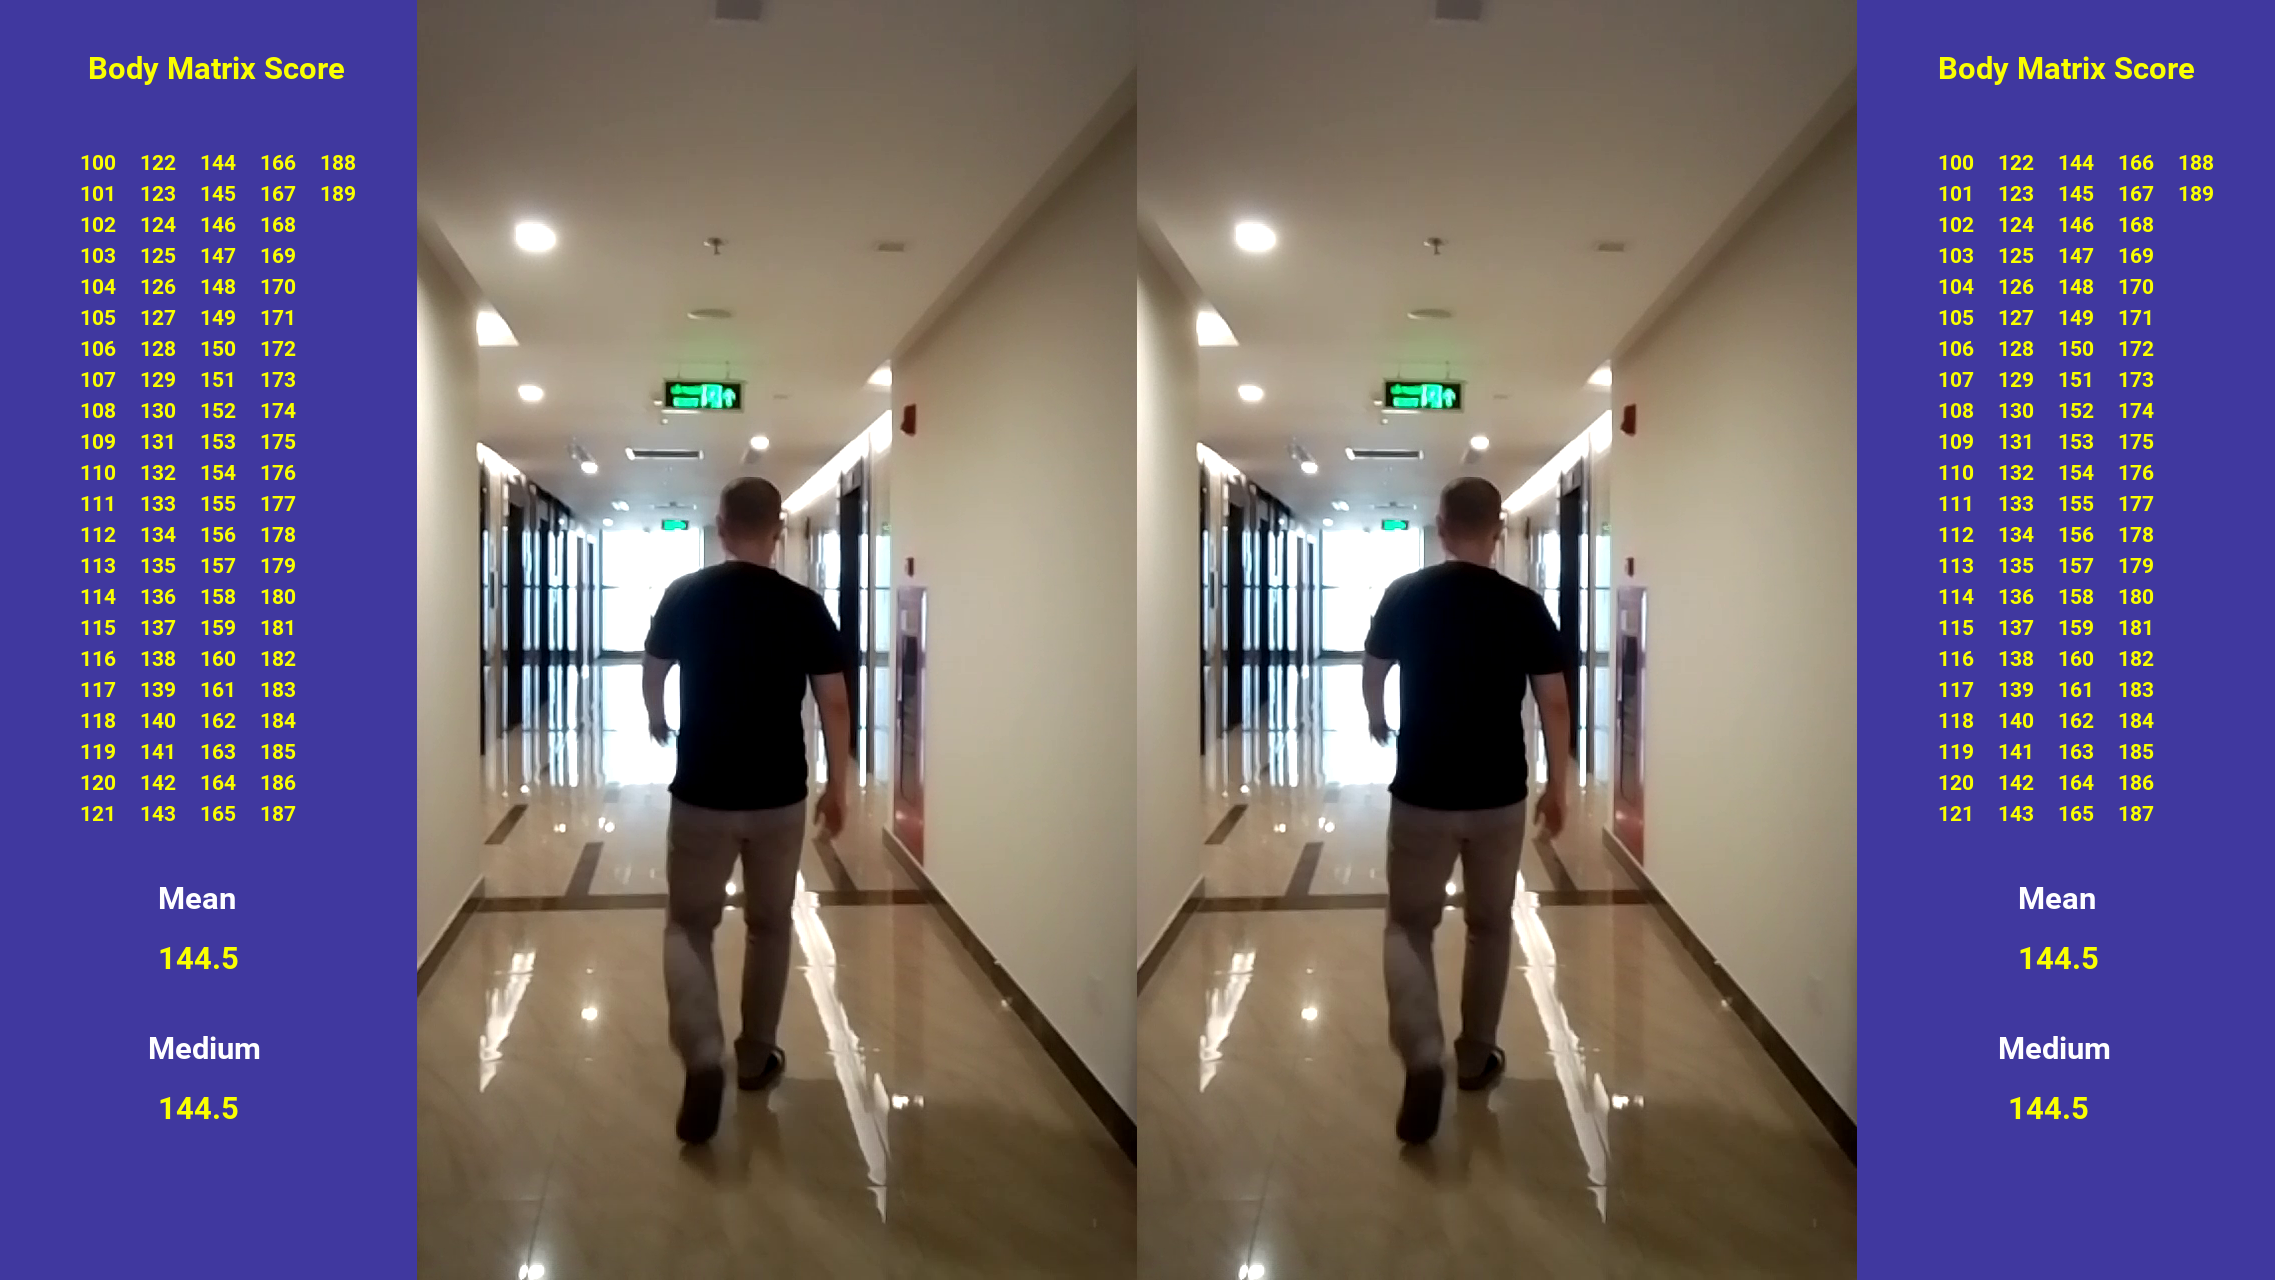

In [134]:
sample03